In [55]:
from dataprovider import DataProvider
from model import Encoder
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score

## WORKS ON 'mnist_classifier' BRANCH

In [41]:
sample_size = 1 
input_dim = 784
hidden_size = 512
num_factors = 15
latent_dim = 256
max_pix_val = 255

In [42]:
def get_pred (encoder, iterator, norm_test=False):
    actual_target, pred_target = [], []
    for batch in tqdm (range(len(iterator))):
        x, y = iterator[batch]
        _, _, multinom = encoder(x)
        actual_target.append(y)
        if norm_test:
            _, _, multinom1 = encoder(x*max_pix_val)
            pred_target.append((
                np.argmax(multinom.data.numpy()), 
                np.argmax(multinom1.data.numpy()), 
            ))
        else:
            pred_target.append(np.argmax(multinom.data.numpy()))
    return actual_target, pred_target

In [43]:
def visualize (arrs, titles, plot_type='bar'):
    num_plots = len(arrs)
    fig, ax = plt.subplots (1, num_plots, figsize=(20, 10))
    for i in range(num_plots):
        ax[i].set_title (titles[i])
        if 'bar' in plot_type:
            ax[i].bar (range(num_factors), arrs[i])
        else:
            ax[i].plot (arrs[i])
    plt.show ()
    plt.close()

## HOW DOES INITIAL CLUSTERING CHANGE WITH NUMBER OF LAYERS

In [54]:
one, three= [], []
for i in range(5):
    encoder_1 = Encoder(input_dim, hidden_size, num_factors, latent_dim, num_layers=1)
    encoder_2 = Encoder(input_dim, hidden_size, num_factors, latent_dim, num_layers=3)
    dataprovider = DataProvider(sample_size, input_dim)

    iterator = list(dataprovider.data_iterator(train=True))
    targ_one, pred_one = get_pred (encoder_1, iterator)
    targ_two, pred_two = get_pred (encoder_2, iterator)

    one_layer_bin, two_layer_bin = np.bincount (pred_one, minlength=num_factors), \
                                                np.bincount (pred_two,  minlength=num_factors)
    one_layer_nmi = normalized_mutual_info_score(targ_one, pred_one)
    two_layer_nmi = normalized_mutual_info_score(targ_two, pred_two)
#     visualize ([one_layer_bin, two_layer_bin], \
#                    ['1 Layer - {}'.format(str(one_layer_nmi)), '2 Layers - {}'.format(str(two_layer_nmi))])
    one.append(one_layer_nmi)
    three.append(two_layer_nmi)

The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


In [66]:
print one, np.mean(one)
print three, np.mean(three)
print five, np.mean (five)
print ten, np.mean (ten)
import random
from copy import copy
targ_three = copy(targ_one)
random.shuffle (targ_three)
print len(targ_one), len(targ_three)
print normalized_mutual_info_score(targ_one, targ_three)


[0.10790106696216986, 0.08051745921272276, 0.12040699502835588, 0.10672490515565199, 0.07647661561702036] 0.09840540839518416
[0.07752307097388957, 0.0698782965091171, 0.13979518565422325, 0.07802620681667906, 0.14830322426612808] 0.1027051968440074
[0.09581844476350329, 0.12815434014779584, 0.06846028802086812, 0.06944467273934006, 0.0672448923560428] 0.08582452760551003
[0.04919711253186798, 0.12024230433599276, 0.10584117332950221, 0.13228610231400464, 0.1138068644413121] 0.10427471139053593
5000 5000
0.003534131903633712


## HOW DOES CLUSTERING CHANGE WITH MAGNIFICATION OF INPUT

In [70]:
encoder = Encoder(input_dim, hidden_size, num_factors, latent_dim)

The installed widget Javascript is the wrong version.


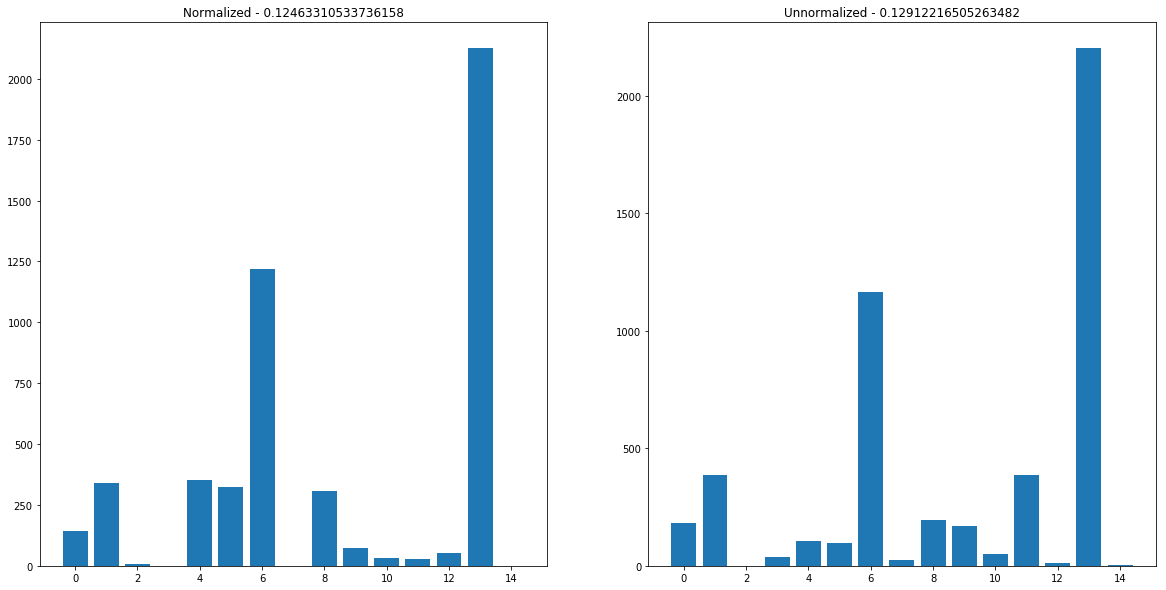

In [71]:
dataprovider = DataProvider(sample_size, input_dim)
iterator = list(dataprovider.data_iterator(train=True))
targ, preds = get_pred (encoder, iterator, norm_test=True)
pred_normed, pred_unnormed = zip (*preds)
normed_bin, unnormed_bin = np.bincount (pred_normed, minlength=num_factors), \
                                            np.bincount (pred_unnormed,  minlength=num_factors)
normed_nmi = normalized_mutual_info_score(targ, pred_normed)
unnormed_nmi = normalized_mutual_info_score(targ, pred_unnormed)
visualize ([normed_bin, unnormed_bin], \
               ['Normalized - {}'.format(str(normed_nmi)), 'Unnormalized - {}'.format(str(unnormed_nmi))])

## HOW DOES CLUSTERING CHANGE WITH PRIOR NUM_CLUSTERS

In [84]:
num_latent = list(range(4, 30, 2))
nmi_scores = []
for latent in num_latent:
    encoder = Encoder(input_dim, hidden_size, latent, latent_dim)
    iterator = list(dataprovider.data_iterator(train=True))
    targ, preds = get_pred (encoder, iterator, norm_test=False)
    nmi_scores.append (normalized_mutual_info_score(targ, preds))

The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


The installed widget Javascript is the wrong version.


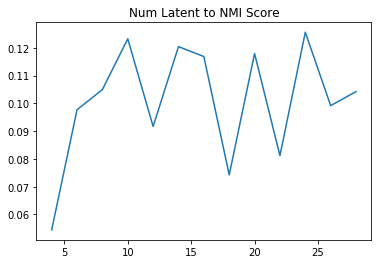

In [85]:
plt.plot (num_latent, nmi_scores)
plt.title ('Num Latent to NMI Score')
plt.show ()